# Classification

#### Machine Learning with Python - Notebook #2

Description:
- KNN (K-Nearest Neighbors)
- Decision Trees
- Logistic Regrssion
- SVM (Support Vector Machine)




**Import Libraries**

In [65]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


**Download Data**

In [66]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv")
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


**Data Visualization & Analysis**

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c648e24f0>]],
      dtype=object)

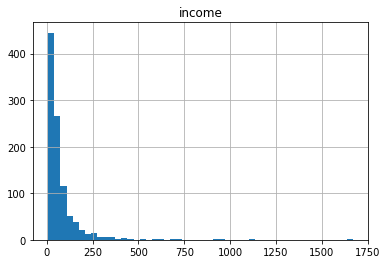

In [67]:
print(data['custcat'].value_counts())
data.hist(column = 'income', bins = 50)

**Feature Engineering**

In [68]:
X = data[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] #exploratory, independent values
y = data['custcat'] #target, dependent value

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##**KNN Classification**

**Model** (K = 4)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


**Evaluation**

Accuracy Score = function that is equal to Jaccard Score. Essentially, it calculates how closely the actual labels ad predicted labels match.

In [70]:
from sklearn import metrics
print("Acuracy Score: ", metrics.accuracy_score(y_test, predictions))

Acuracy Score:  0.325


**Model Tuning:** What K value results in the best Accuracy Score?

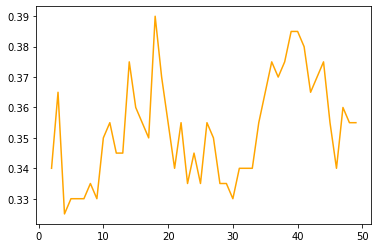

In [71]:
accuracies = []
for k in range(2, 50):
  model = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
  predictions = model.predict(X_test)
  accuracies.append(metrics.accuracy_score(y_test, predictions))

plt.plot(range(2, 50), accuracies, color = 'orange')
plt.show()

## **Decision Trees**

**Model**

In [72]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion  = "entropy", max_depth = 4)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Acuracy Score: ", metrics.accuracy_score(y_test, predictions))

Acuracy Score:  0.35


**Tree Visualization**

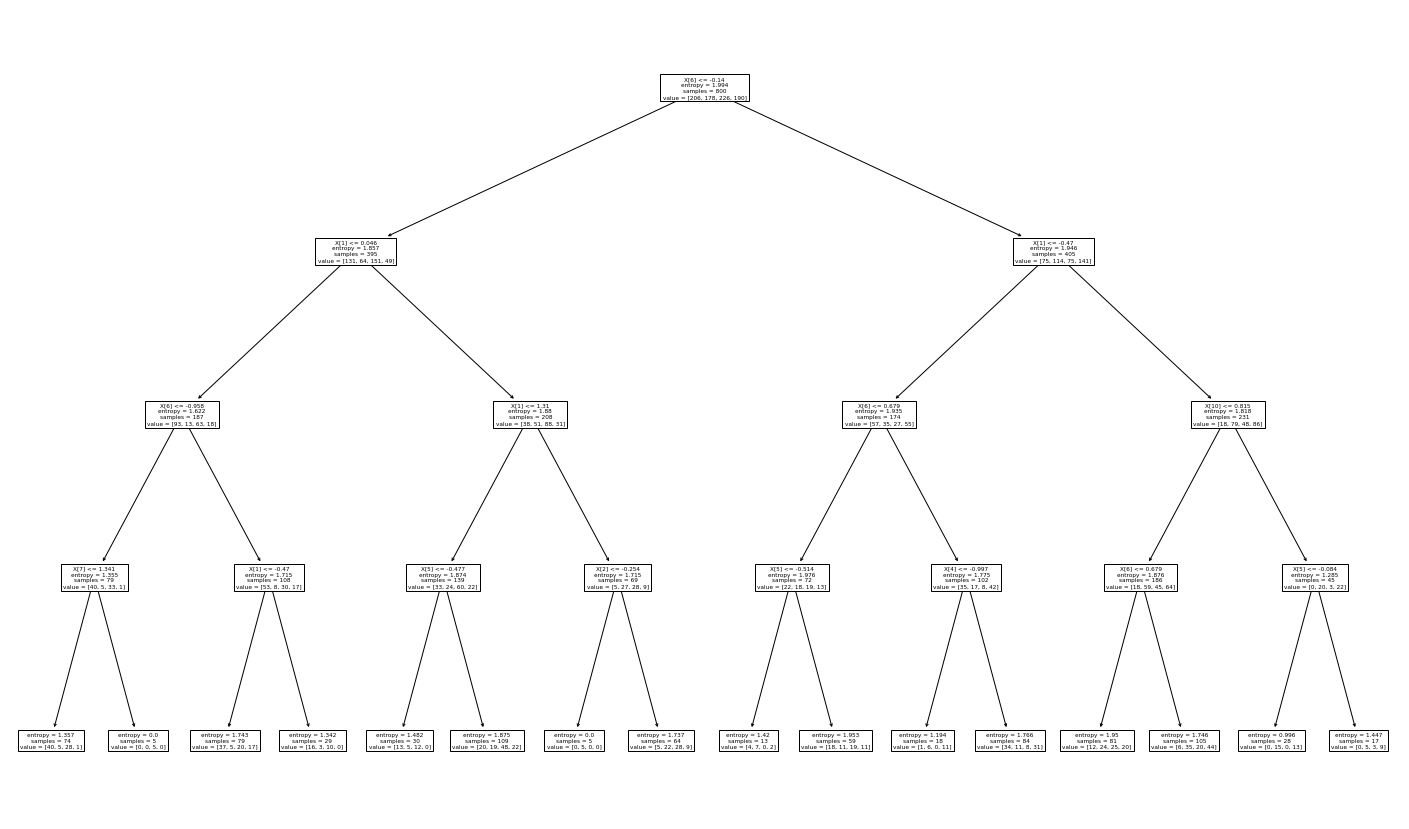

In [73]:
import sklearn.tree as tree

plt.figure(figsize = (25, 15))
tree.plot_tree(model)
plt.show()

**Model Tuning**: Would different max_depth values imact the accuracy?

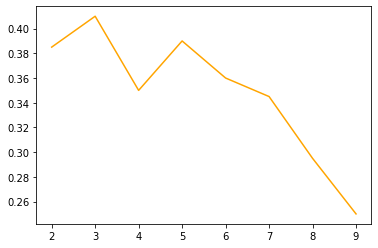

In [74]:
accuracies = []
for md in range(2, 10):
  model = DecisionTreeClassifier(criterion = 'entropy', max_depth = md).fit(X_train, y_train)
  predictions = model.predict(X_test)
  accuracies.append(metrics.accuracy_score(y_test, predictions))

plt.plot(range(2, 10), accuracies, color = 'orange')
plt.show()

## **Support Vector Machine (SVM)**

**Model**

In [75]:
from sklearn import svm

model = svm.SVC(kernel = 'rbf')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

**Evaluation**

Common evaluation metric for SVM is F1-Score

F1-Score:  0.38


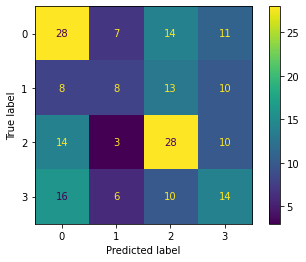

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, jaccard_score
cnf_mtx = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cnf_mtx).plot()

print("F1-Score: ", round(f1_score(y_test, predictions, average = 'weighted'), 2))

## **Logistics Regression**

Great for *binary classification*

**Data Preparations** Use different dataset to examine binary (1 / 0) classification

In [79]:
data_lr = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")
data_lr = data_lr[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless','churn']]

X, y = data_lr[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless']], data_lr['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

data_lr.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0


**Model**

In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 0.01, solver = 'liblinear')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

**Probability Predictions**

*predict_proba*  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):


In [81]:
predictions_prob = model.predict_proba(X_test)
predictions_prob #for 40 values in test set

array([[0.86, 0.14],
       [0.86, 0.14],
       [0.76, 0.24],
       [0.91, 0.09],
       [0.73, 0.27],
       [0.53, 0.47],
       [0.63, 0.37],
       [0.87, 0.13],
       [0.42, 0.58],
       [0.9 , 0.1 ],
       [0.91, 0.09],
       [0.94, 0.06],
       [0.47, 0.53],
       [0.51, 0.49],
       [0.86, 0.14],
       [0.83, 0.17],
       [0.7 , 0.3 ],
       [0.83, 0.17],
       [0.77, 0.23],
       [0.64, 0.36],
       [0.85, 0.15],
       [0.65, 0.35],
       [0.93, 0.07],
       [0.56, 0.44],
       [0.79, 0.21],
       [0.95, 0.05],
       [0.76, 0.24],
       [0.8 , 0.2 ],
       [0.6 , 0.4 ],
       [0.96, 0.04],
       [0.91, 0.09],
       [0.88, 0.12],
       [0.42, 0.58],
       [0.92, 0.08],
       [0.88, 0.12],
       [0.75, 0.25],
       [0.38, 0.62],
       [0.56, 0.44],
       [0.97, 0.03],
       [0.86, 0.14]])

**Evaluation**

For binary classification, it is useful to use 
- Jaccard Score for model performance score
- Confusion Metrics for visualization
- Log Loss for score on the predicted probability

Jaccard Score:  0.65
Log Loss:  11.225122318281727


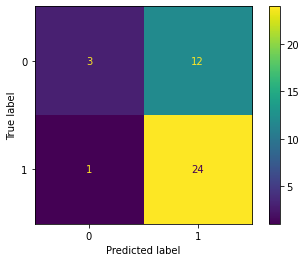

In [83]:
from sklearn.metrics import jaccard_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, log_loss

print("Jaccard Score: ", round(jaccard_score(y_test, predictions, pos_label = 0), 2)) #Jaccard Score is commonly used for Logistic Regrssion

#Confusion Matrix:
cnf_mtx = confusion_matrix(y_test, predictions, labels = [1, 0])
ConfusionMatrixDisplay(cnf_mtx).plot()

print("Log Loss: ", log_loss(y_test, predictions))